In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel               
from yellowbrick.model_selection import FeatureImportances
from sklearn.ensemble import RandomForestRegressor
from category_encoders import HashingEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [52]:
data=pd.read_csv('beijing_train.csv')
data.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [53]:
data.describe()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,395301.000000,397554.000000,395000.000000,391917.000000,383515.000000,390769.000000,403512.000000,403511.000000,403507.000000,403515.000000,403538.000000
mean,16824.500000,2014.564194,6.735378,15.748217,11.500000,79.248275,104.327897,15.733060,50.352785,1214.843339,58.119327,14.088899,1010.282534,3.157291,0.067052,1.718380
std,9713.352953,1.097503,3.356479,8.808891,6.922195,79.146708,90.136400,21.739455,34.771910,1124.285676,57.375966,11.303534,10.356778,13.617273,0.837845,1.237965
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8412.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,2.000000,23.000000,500.000000,11.000000,4.000000,1002.000000,-8.000000,0.000000,0.900000
50%,16824.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,83.000000,7.000000,43.000000,900.000000,45.000000,15.400000,1009.800000,4.200000,0.000000,1.400000
75%,25236.250000,2016.000000,10.000000,23.000000,17.250000,110.000000,145.000000,19.000000,71.000000,1500.000000,83.000000,23.500000,1018.300000,15.500000,0.000000,2.200000
max,33648.000000,2016.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   REF_NO   403776 non-null  int64  
 1   year     403776 non-null  int64  
 2   month    403776 non-null  int64  
 3   day      403776 non-null  int64  
 4   hour     403776 non-null  int64  
 5   PM2.5    395301 non-null  float64
 6   PM10     397554 non-null  float64
 7   SO2      395000 non-null  float64
 8   NO2      391917 non-null  float64
 9   CO       383515 non-null  float64
 10  O3       390769 non-null  float64
 11  TEMP     403512 non-null  float64
 12  PRES     403511 non-null  float64
 13  DEWP     403507 non-null  float64
 14  RAIN     403515 non-null  float64
 15  wd       402387 non-null  object 
 16  WSPM     403538 non-null  float64
 17  station  403776 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.5+ MB


In [55]:
data.isnull().sum()

REF_NO         0
year           0
month          0
day            0
hour           0
PM2.5       8475
PM10        6222
SO2         8776
NO2        11859
CO         20261
O3         13007
TEMP         264
PRES         265
DEWP         269
RAIN         261
wd          1389
WSPM         238
station        0
dtype: int64

In [56]:
data['PM2.5']=data['PM2.5'].fillna(79.248275)
data['PM10']=data['PM10'].fillna(104.327897)
data['SO2']=data['SO2'].fillna(15.733060)
data['NO2']=data['NO2'].fillna(50.352785)
data['CO']=data['CO'].fillna(1214.843339)
data['O3']=data['O3'].fillna(58.119327)
data['TEMP']=data['TEMP'].fillna(14.088899)
data['PRES']=data['PRES'].fillna(1010.282534)
data['DEWP']=data['DEWP'].fillna(3.157291)
data['RAIN']=data['RAIN'].fillna(0)
data['wd']=data['wd'].fillna('NE')
data['WSPM']=data['WSPM'].fillna(1.718380)

In [57]:
data.isnull().sum()

REF_NO     0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [58]:
obj_col=[]
for col in data:
    if data[col].dtype=='object':
        obj_col.append(col)

In [59]:
Num_col=[]
for col in data:
    if col not in obj_col:
        Num_col.append(col)

In [60]:
len(Num_col)

16

In [61]:
Num_col

['REF_NO',
 'year',
 'month',
 'day',
 'hour',
 'PM2.5',
 'PM10',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'TEMP',
 'PRES',
 'DEWP',
 'RAIN',
 'WSPM']

<AxesSubplot:ylabel='WSPM'>

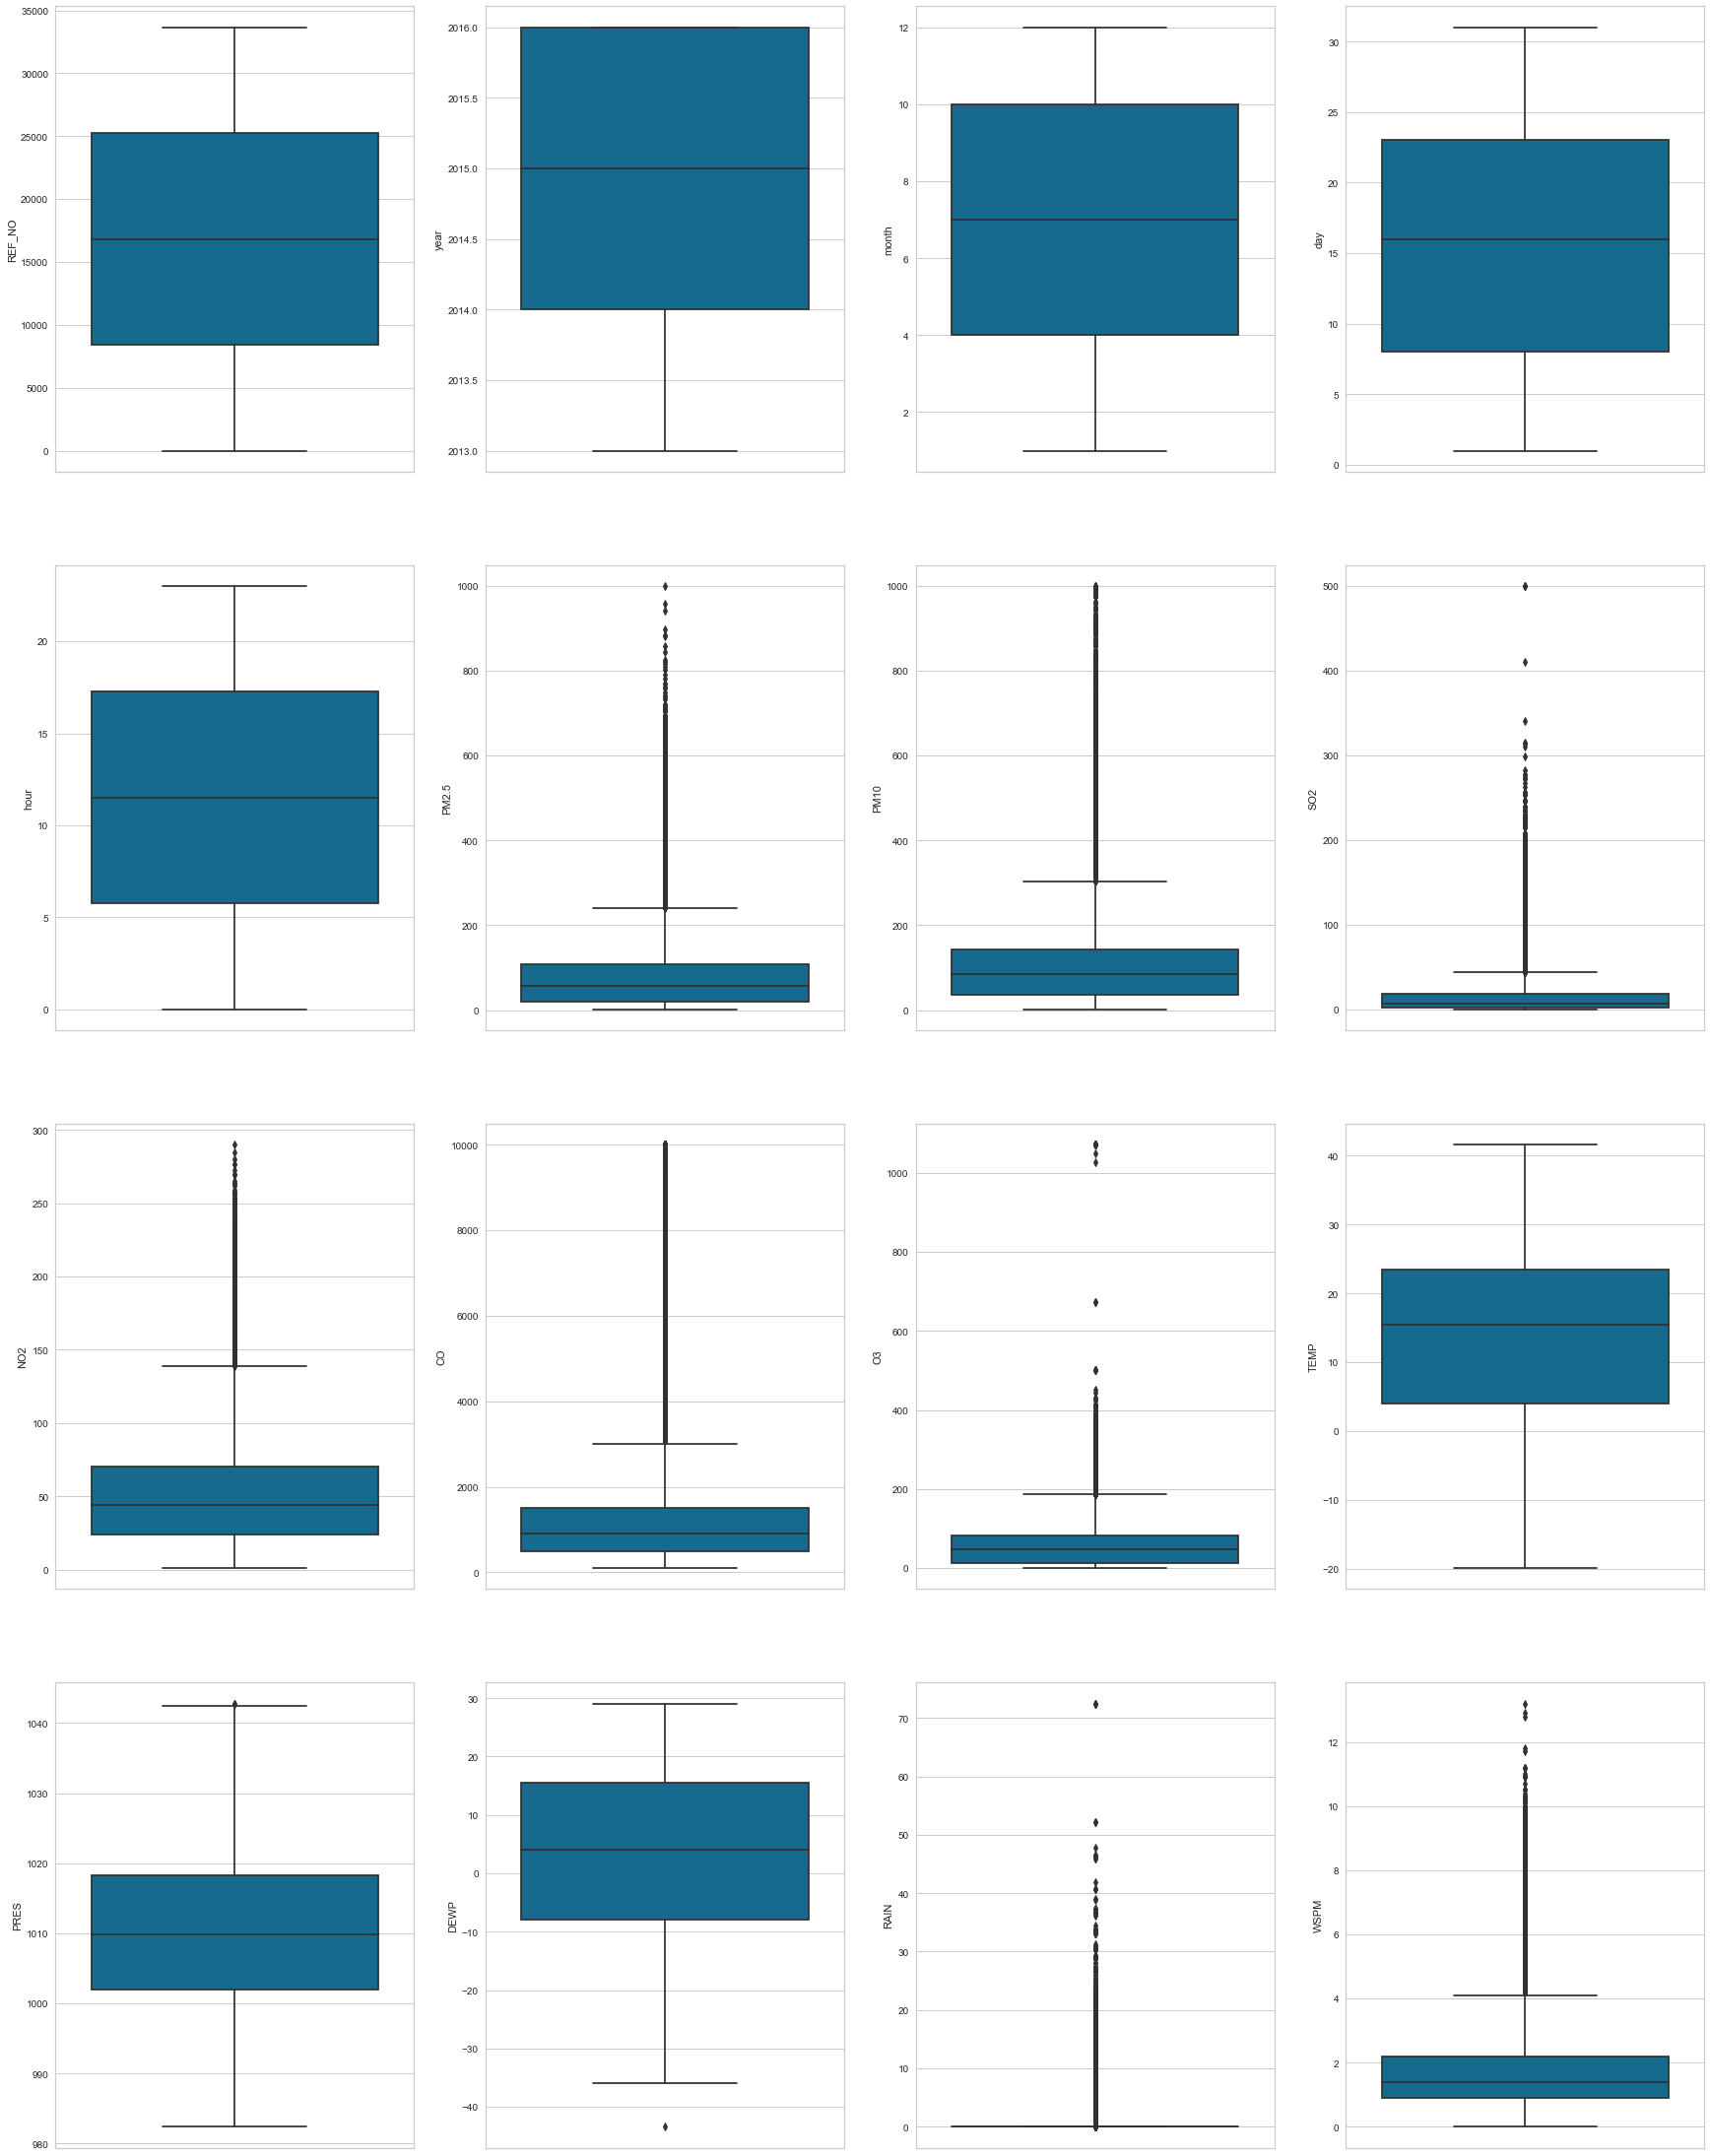

In [62]:
fig,axes=plt.subplots(4,4,figsize=(30,40))
sns.boxplot(ax=axes[0,0],data=data,y=data['REF_NO'])
sns.boxplot(ax=axes[0,1],data=data,y=data['year'])
sns.boxplot(ax=axes[0,2],data=data,y=data['month'])
sns.boxplot(ax=axes[0,3],data=data,y=data['day'])
sns.boxplot(ax=axes[1,0],data=data,y=data['hour'])
sns.boxplot(ax=axes[1,1],data=data,y=data['PM2.5'])
sns.boxplot(ax=axes[1,2],data=data,y=data['PM10'])
sns.boxplot(ax=axes[1,3],data=data,y=data['SO2'])
sns.boxplot(ax=axes[2,0],data=data,y=data['NO2'])
sns.boxplot(ax=axes[2,1],data=data,y=data['CO'])
sns.boxplot(ax=axes[2,2],data=data,y=data['O3'])
sns.boxplot(ax=axes[2,3],data=data,y=data['TEMP'])
sns.boxplot(ax=axes[3,0],data=data,y=data['PRES'])
sns.boxplot(ax=axes[3,1],data=data,y=data['DEWP'])
sns.boxplot(ax=axes[3,2],data=data,y=data['RAIN'])
sns.boxplot(ax=axes[3,3],data=data,y=data['WSPM'])

In [63]:
Num_col

['REF_NO',
 'year',
 'month',
 'day',
 'hour',
 'PM2.5',
 'PM10',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'TEMP',
 'PRES',
 'DEWP',
 'RAIN',
 'WSPM']

In [64]:
outlier=['SO2','NO2','CO','O3','WSPM']

In [65]:
for col in outlier:
    data[col]=sorted(data[col])
    q1=np.percentile(data[col],25)
    q3=np.percentile(data[col],75)
    iqr=q3-q1
    lwr=q1-(1.5*iqr)
    upr=q3+(1.5*iqr)
    tenth=np.percentile(data[col],10)
    ninty=np.percentile(data[col],90)
    print('Column name: ',col)
    print('q1 and q3 :',q1 , q3)
    print('inter quartile range :',iqr)
    print('lower and upper boundary : ',lwr , upr)
    print('tenth percentile : ',tenth);print('nintieth percentile : ',ninty)
    data[col]=np.where(data[col]<lwr,tenth,data[col])
    data[col]=np.where(data[col]>upr,ninty,data[col])
    print('Imputed successfully')
    print('\n')

Column name:  SO2
q1 and q3 : 2.2848 19.0
inter quartile range : 16.7152
lower and upper boundary :  -22.788 44.0728
tenth percentile :  2.0
nintieth percentile :  41.0
Imputed successfully


Column name:  NO2
q1 and q3 : 24.0 70.0
inter quartile range : 46.0
lower and upper boundary :  -45.0 139.0
tenth percentile :  13.0
nintieth percentile :  98.0
Imputed successfully


Column name:  CO
q1 and q3 : 500.0 1500.0
inter quartile range : 1000.0
lower and upper boundary :  -1000.0 3000.0
tenth percentile :  300.0
nintieth percentile :  2500.0
Imputed successfully


Column name:  O3
q1 and q3 : 12.0 82.0
inter quartile range : 70.0
lower and upper boundary :  -93.0 187.0
tenth percentile :  2.0
nintieth percentile :  134.0
Imputed successfully


Column name:  WSPM
q1 and q3 : 0.9 2.2
inter quartile range : 1.3000000000000003
lower and upper boundary :  -1.0500000000000003 4.15
tenth percentile :  0.6
nintieth percentile :  3.4
Imputed successfully




In [66]:
data1=data.copy()

In [67]:
data1['CO'].max()

3000.0

In [68]:
data['WSPM'].max()

4.1

<AxesSubplot:ylabel='O3'>

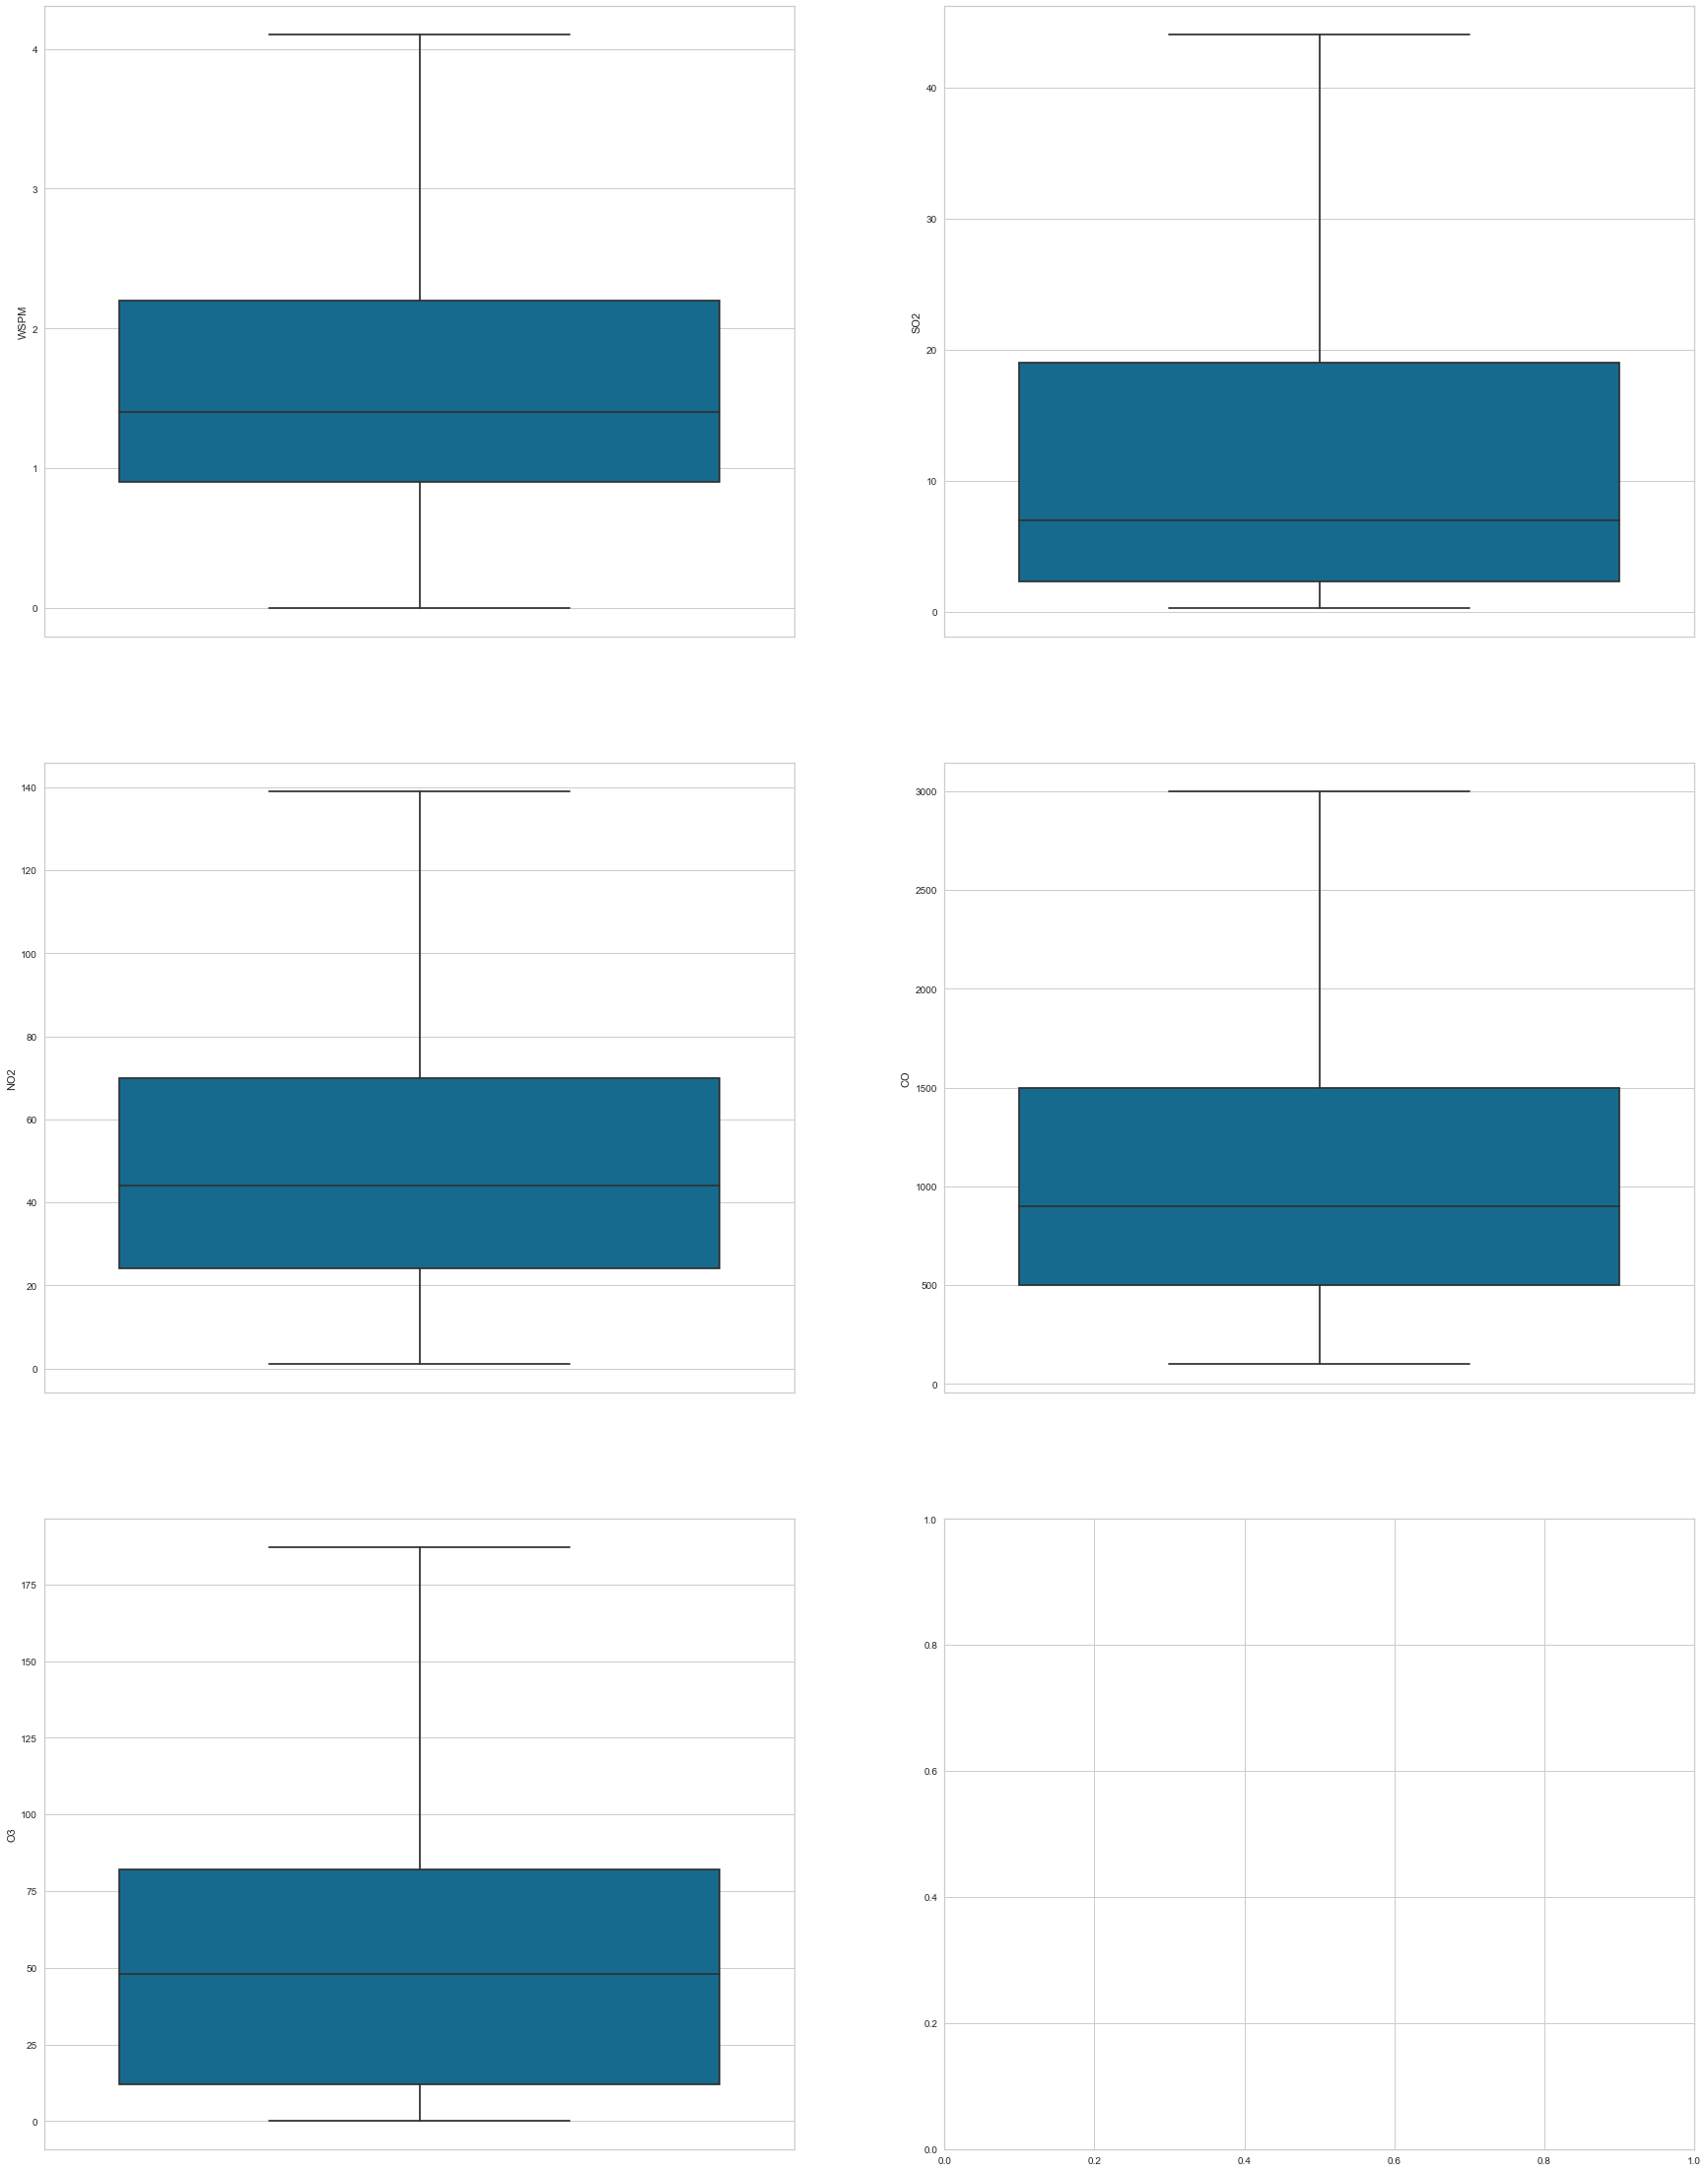

In [69]:
fig,axes=plt.subplots(3,2,figsize=(30,40))
sns.boxplot(ax=axes[0,0],data=data,y=data['WSPM'])
sns.boxplot(ax=axes[0,1],data=data,y=data['SO2'])
sns.boxplot(ax=axes[1,0],data=data,y=data['NO2'])
sns.boxplot(ax=axes[1,1],data=data,y=data['CO'])
sns.boxplot(ax=axes[2,0],data=data,y=data['O3'])

In [70]:
obj_col

['wd', 'station']

In [71]:
#sns.pairplot(data1)

In [72]:
#sns.heatmap(data1.corr(),annot=True)

In [76]:
encoder=HashingEncoder(cols=obj_col,n_components=14)
data2=encoder.fit_transform(data1)

In [77]:
data2.columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'REF_NO',
       'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'],
      dtype='object')

In [78]:
X=data2.drop('PM2.5',axis=1)
y=data2['PM2.5']

In [79]:
X_scaled=StandardScaler().fit_transform(X)
X=pd.DataFrame(data=X_scaled,columns=X.columns)

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [82]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (323020, 29)
y_train shape:  (323020,)

Test cases as below
X_test shape:  (80756, 29)
y_test shape:  (80756,)


C:\Users\7560\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted values')

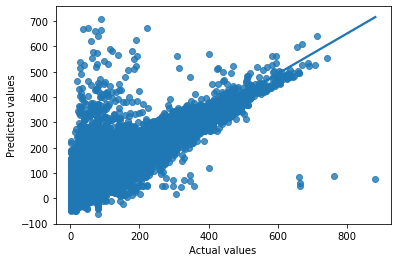

In [33]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)
y_pred_train=linreg.predict(X_train)
y_pred_test=linreg.predict(X_test)
sns.regplot(y_test,y_pred_test)
plt.xlabel(xlabel='Actual values')
plt.ylabel(ylabel='Predicted values')


In [35]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 35.37215638378316
RMSE for test set is 35.13277270719194


In [42]:
lasso=Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
y_pred_train=lasso.predict(X_train)
y_pred_test=lasso.predict(X_test)
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))


RMSE for training set is 35.50420219353233
RMSE for test set is 35.27124295413228


In [85]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train,y_train)
y_pred_train=knn.predict(X_train)
y_pred_test=knn.predict(X_test)
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 19.389107028431805
RMSE for test set is 29.169891056481102


In [36]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred_train=dtr.predict(X_train)
y_pred_test=dtr.predict(X_test)


In [37]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 3.9051158021454664e-14
RMSE for test set is 24.3353634282595


In [40]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))


RMSE for training set is 6.344231378217336
RMSE for test set is 17.049707860735715


In [40]:
selector=SelectFromModel(estimator=RandomForestRegressor(n_estimators=100,random_state=42,n_jobs=-1))
selector.fit(X,y)
selected_feat=X.columns[(selector.get_support())].to_list()
print('Total Features Selected are', len(selected_feat))
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_feat)

Total Features Selected are 4
Threshold set by Model: 0.03
Important Features: ['REF_NO', 'PM10', 'TEMP', 'DEWP']


In [107]:
X=data2[['REF_NO', 'PM10', 'TEMP', 'DEWP']]
y=data2['PM2.5']

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (323020, 4)
y_train shape:  (323020,)

Test cases as below
X_test shape:  (80756, 4)
y_test shape:  (80756,)


In [47]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 6.986132491463828
RMSE for test set is 18.81997881787229


In [109]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train,y_train)
y_pred_train=knn.predict(X_train)
y_pred_test=knn.predict(X_test)
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 12.302673908034832
RMSE for test set is 18.058542092100513


In [112]:
test=pd.read_csv('beijing_test.csv')
test=test[['REF_NO', 'PM10', 'TEMP', 'DEWP']]
test.shape

(16728, 4)

In [114]:
result=knn.predict(test)
result=pd.Series(data=result)
submission=pd.read_csv('beijing_test.csv')
submission['PM']=result
submission.drop(['year', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2', 'CO','O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],axis=1,inplace=True)
submission.to_csv('submission_file.csv',index=False,header=False)